<a href="https://colab.research.google.com/github/NWJoman/AH2179/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test


In [ ]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
# Different methods used
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score, precision_score, recall_score
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise-3%20mode%20choice%20model/modeChoiceData.csv'
data = pd.read_csv(url)

In [ ]:
data.head()

,ID,time_car,cost_car,time_bus,cost_bus,access_bus,time_air,cost_air,access_air,service_air,time_rail,cost_rail,access_rail,service_rail,choice
0,1,275,50,330,35,20,80,65,55,food,120,45,5,no-frills,air
1,2,275,45,330,15,5,70,110,40,wifi,170,55,25,food,rail
2,3,275,45,390,15,25,70,80,55,no-frills,155,35,5,no-frills,rail
3,4,300,45,300,15,10,60,110,40,wifi,155,65,20,no-frills,rail
4,5,390,35,390,35,10,60,95,45,wifi,155,65,15,food,rail


In [ ]:
#One-Hot Encoding
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])

x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

{'C': 0.017}
Accuracy: 0.5762987012987013
Precision: [0.55714286 0.25       0.48401826 0.67193676]
Recall: [0.56521739 0.04545455 0.53807107 0.65637066]


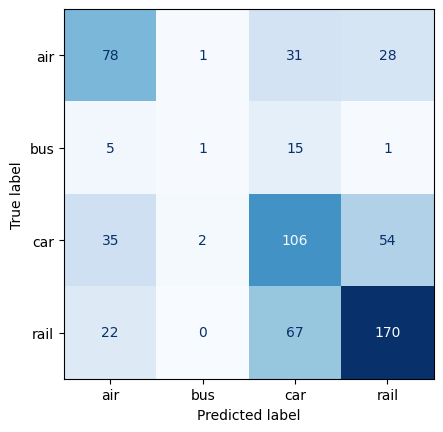

In [ ]:
#(1)LR
params = {
     'C': [0.017] # Tested from spans 0.01 to 5 in varied increments
 }
model = LogisticRegression(max_iter=1000, random_state=0)

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

{'n_neighbors': 31, 'weights': 'uniform'}
Accuracy: 0.5032467532467533


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: [0.47692308 0.         0.43243243 0.57575758]
Recall: [0.44927536 0.         0.48730964 0.58687259]


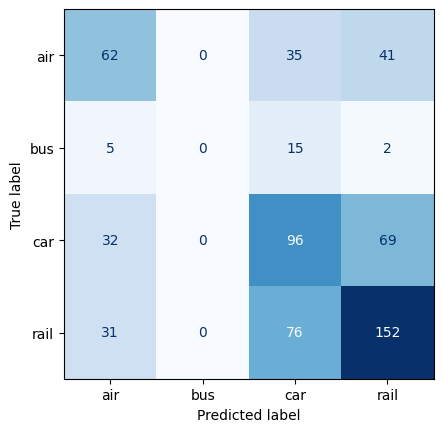

In [ ]:
#(2)KNN
params = {
     'n_neighbors': [31], #Tested in the range 20 to 50
     'weights': ['uniform']
}
model=KNeighborsClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.5438311688311688
Precision: [0.59       0.         0.4389313  0.63385827]
Recall: [0.42753623 0.         0.58375635 0.62162162]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


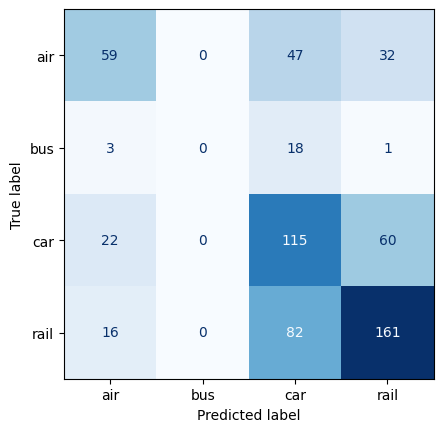

In [ ]:
#(3)RF
# Saw no difference between 100 and 500 n_estimators so left it at 100, at 750 it got slightly better results but im unsure if that would be too many.

params = {
     'n_estimators': [100],
     'max_depth': [4], #Tested from 1 to 30
     'min_samples_split': [2], #Tested from 1 to 10
     'min_samples_leaf': [1] #Tested from 1 to 5
 }
model = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

{'learning_rate': 0.011, 'max_depth': 3, 'n_estimators': 300}
Accuracy: 0.5746753246753247
Precision: [0.57462687 0.         0.4841629  0.651341  ]
Recall: [0.55797101 0.         0.54314721 0.65637066]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


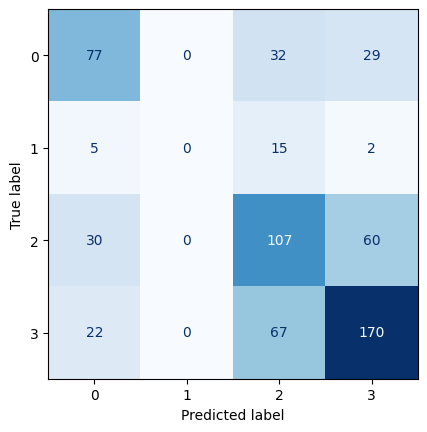

In [ ]:
#(4)XGBoost
params = {
     'learning_rate': [0.011], #Tested from 0.01 to 0.2
     'n_estimators': [300],#Tested 100, 200, 300, 450, 600
     'max_depth': [3] #Tested 1 to 5
 }
map = {'air': 0, 'bus': 1, 'car': 2,'rail':3}
y_train = y_train.map(map)
y_test = y_test.map(map)
model =  XGBClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

{'C': 0.017}
Accuracy: 0.5698051948051948
Precision: [0.54794521 0.         0.47663551 0.66015625]
Recall: [0.57971014 0.         0.5177665  0.65250965]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


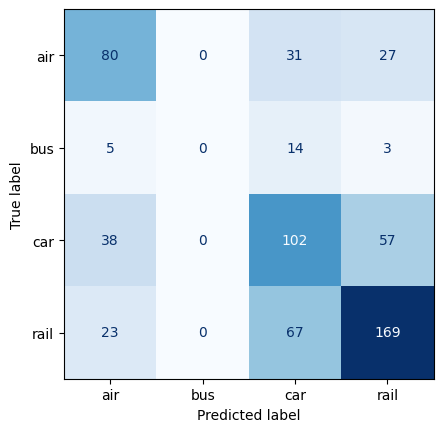

In [ ]:
#(5)SVM
params = {
    'C': [0.017], #Tested 0.01 to 10
}

model= SVC(kernel="linear")

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')